In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
img_input = keras.Input(shape=(32,32,3))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

In [6]:
dense = layers.Dense(64, activation="relu")
x=dense(inputs)
x.shape

TensorShape([None, 64])

In [7]:
x=layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(10)(x)
outputs.shape

TensorShape([None, 10])

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


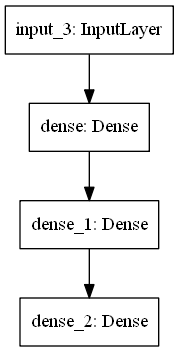

In [14]:
keras.utils.plot_model(model, "mnist_model.png")

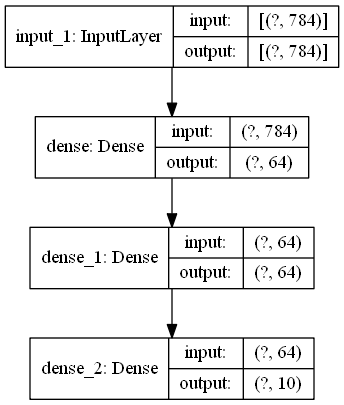

In [10]:
keras.utils.plot_model(model, "mnist_model_with_shape.png", show_shapes=True)

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255
model.compile(
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=keras.optimizers.RMSprop(),
metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2)

test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss : ", test_scores[0])
print("Test accuracy : ", test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 4s 78us/sample - loss: 0.3492 - accuracy: 0.9016 - val_loss: 0.1786 - val_accuracy: 0.9501
Epoch 2/2
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1613 - accuracy: 0.9529 - val_loss: 0.1503 - val_accuracy: 0.9572
10000/1 - 1s - loss: 0.0772 - accuracy: 0.9564
Test loss :  0.13846855065077543
Test accuracy :  0.9564


In [ ]:
model.save("path_to_my_model")
del model
model = keras.models.load_model("path_to_my_model")

In [ ]:
encoder_input = keras.Input(shape=(28,28,1), name = "img")
x=layers.Conv2D(16,3,activation = "relu")(encoder_input)  #padding='same' 안했으므로 사이즈 28->26
x=layers.Conv2D(32,3,activation = "relu")(x)              #padding='same' 안했으므로 사이즈 26->24
x=layers.MaxPooling2D(3)(x)                               #3x3필터로 maxpooling 했으므로 24->8
x=layers.Conv2D(32,3,activation="relu")(x)               #padding='same' 안했으므로 사이즈 8->6
x=layers.Conv2D(16,3,activation="relu")(x)               #padding='same' 안했으므로 사이즈 6->4
encoder_output = layers.GlobalMaxPooling2D()(x)          #TensorShape([None, 4, 4, 16]) -> TensorShape([None, 16])

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

In [ ]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation
                           ="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

In [ ]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()
inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
